In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

###### Read data from the .csv file

In [2]:
data_cars=pd.read_csv("cars-dataset.csv")
data_cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


###### Data Set Info

In [3]:
data_cars.shape

(398, 8)

###### Check the columns types in the car dataset

In [4]:
data_cars.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [5]:
data_cars=data_cars.drop("car name", axis=1)
data_cars.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


We see that the column "hp" is of type object. Need to see why it is an object type when there are integer values 

###### 5 points Summary 

In [6]:
data_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


Here also, we see that HP column is missing from the description. It means something is not right. Let evaluate further.

###### Check unique values under the "hp" Column

In [7]:
data_cars.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We see that there is a "?" value mentioned as unique. Therefore, we need to take care of this

In [8]:
temp = pd.DataFrame(data_cars.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
# in temp dataframe

temp[temp['hp'] == False] 

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [9]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
data_cars = data_cars.replace('?', np.nan)


In [10]:
#Let us see if we can get those records with nan

data_cars[data_cars.isnull().any(axis=1)]

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,NaN,2046,19.0,71,25.0
126,6,200.0,NaN,2875,17.0,74,21.0
330,4,85.0,NaN,1835,17.3,80,40.9
336,4,140.0,NaN,2905,14.3,80,23.6
354,4,100.0,NaN,2320,15.8,81,34.5
374,4,151.0,NaN,3035,20.5,82,23.0


In [11]:
#replacing the NaN value with the median value
data_cars['hp']=data_cars['hp'].fillna(data_cars['hp'].median())




In [12]:
# converting the hp column from object / string type to float
data_cars['hp'] = data_cars['hp'].astype('float64')


In [13]:
data_cars.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

###### checking for null or missing values

In [14]:
data_cars.isnull().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

###### checking unique values count in the datafrom for each columns

In [15]:
data_cars.apply(lambda x: len(x.unique()))

cyl       5
disp     82
hp       94
wt      351
acc      95
yr       13
mpg     129
dtype: int64

###### Checking Distribution and Skewness for Car dataset Columns 

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


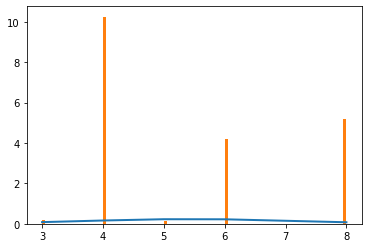

Skew = 0.5269215453528939


In [16]:
#convert cars data DataFrame object to numpy array and sort
numpydf = np.asarray(data_cars['cyl'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_cars['cyl'].skew())

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


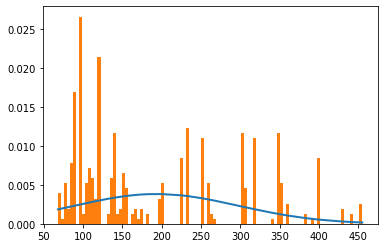

Skew = 0.7196451643005952


In [17]:
#convert cars data DataFrame object to numpy array and sort
numpydf = np.asarray(data_cars['disp'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_cars['disp'].skew())

The Skewness value for "disp" column is less than 1 and greater than 0. Hence it is moderately skewed

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


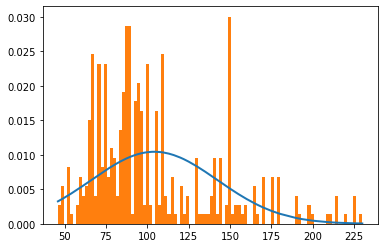

Skew = 1.1062242930872614


In [18]:
#convert cars data DataFrame object to numpy array and sort
numpydf = np.asarray(data_cars['hp'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_cars['hp'].skew())

The Skewness value for "hp" column is greater than 1. Hence it is highly skewed

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


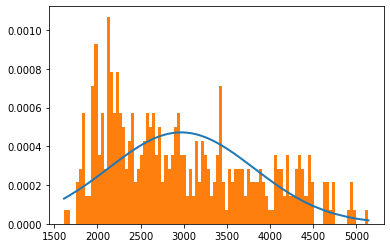

Skew = 0.5310625125994629


In [19]:
#convert cars data DataFrame object to numpy array and sort
numpydf = np.asarray(data_cars['wt'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_cars['wt'].skew())

The Skewness value for "wt" column is less than 1 and greater than 0.5. Hence it is moderately skewed

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


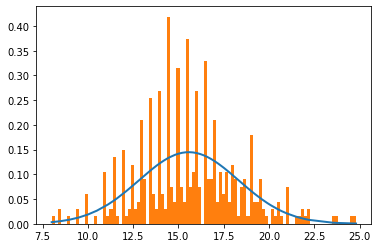

Skew = 0.27877684462588986


In [20]:
#convert cars data DataFrame object to numpy array and sort
numpydf = np.asarray(data_cars['acc'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_cars['acc'].skew())

The Skewness value for "acc" column is less than 0.5 and greater than -0.5. Hence it is approximately symmetric

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


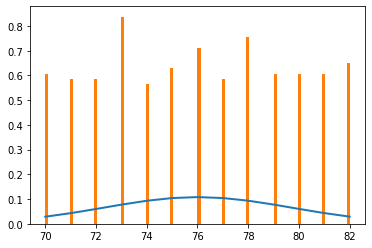

Skew = 0.01153459401509278


In [21]:
#convert cars data DataFrame object to numpy array and sort
numpydf = np.asarray(data_cars['yr'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_cars['yr'].skew())

The Skewness value for "yr" column is less than 0.5 and greater than -0.5. Hence it is approximately symmetric

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


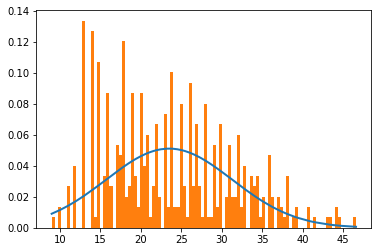

Skew = 0.45706634399491913


In [22]:
#convert cars data DataFrame object to numpy array and sort
numpydf = np.asarray(data_cars['mpg'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_cars['mpg'].skew())

The Skewness value for "mpg" column is less than 0.5 and greater than -0.5. Hence it is approximately symmetric

##### Pairplot to see different relation between columns

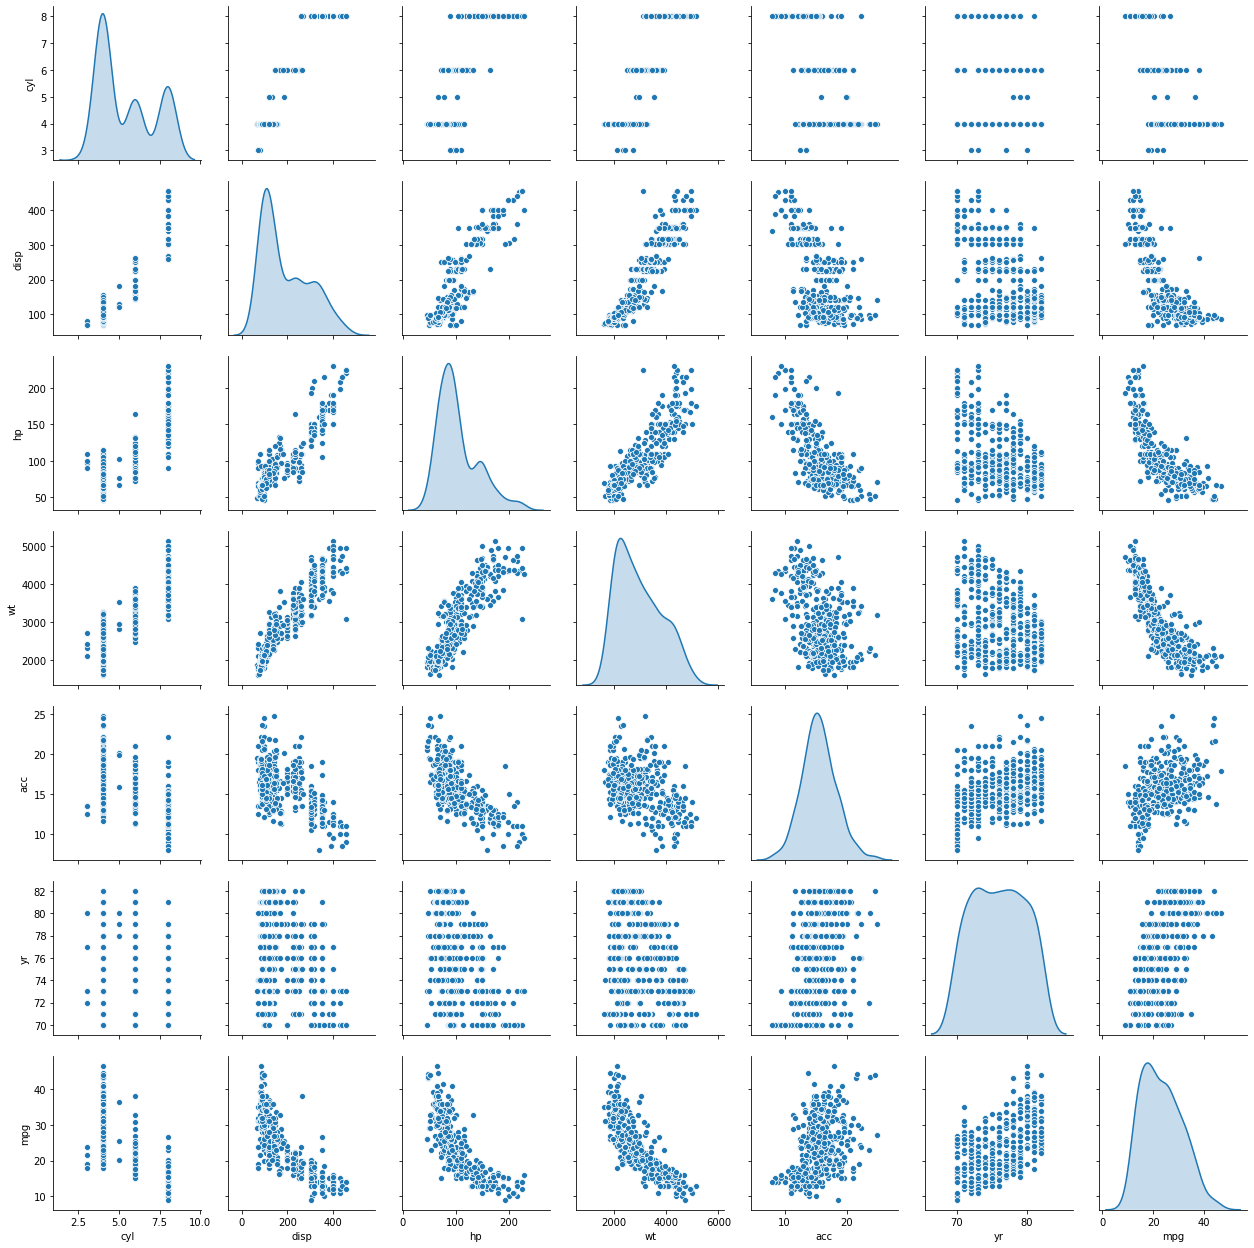

In [23]:
sns.pairplot(data_cars, diag_kind='kde')
plt.show()

**** FROM THE ABOVE DISTRIBUTION PLOT, BELOW OBSERVATION IS HIGHLIGHTED

 All the data distribution showed mixed gaussian distribution. That indicate, its mixed data for different types of cars.
1. As we can see in the distributions, we can clearly see that 3 gaussian distributions are overlapping in cyl, disp, hp and mpg. while it has 2 overlapping curves in acc and yr. That means we have around 3 to 6 clusters in the data
2. Acceleration - Looks like fairly normal distribution.Slight mixed distribution present.
3. Car having 4 cylinder has more observation. That also indicate that the data is biased.
4. As the weight increases miles per gallon decreases
5. As the weight of the car increases, the horse power also increases
6. The more the horsepower, the less will be miles per gallon.
7. MPG, YR, and ACC are approximately skewed. WT, Disp are moderately skewed. HP is highly skewed

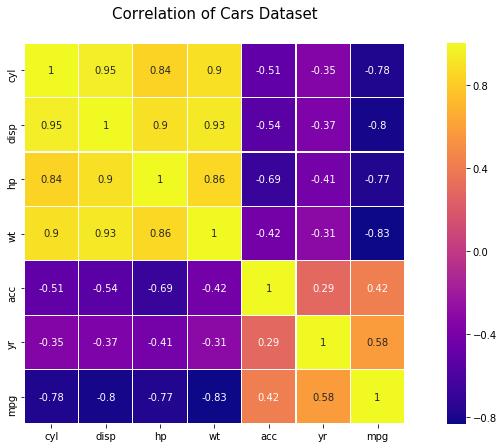

In [24]:
colormap = plt.cm.plasma
plt.figure(figsize=(15,7))
plt.title('Correlation of Cars Dataset', y=1.05, size=15)
sns.heatmap(data_cars.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True)

1. cyl and wt are highly correlated
2. hp and disp are highly correlated
3. acc and hp are moderately correlated
4. mpg is having good correlation with cyl, disp and wt


Need to check for outliers as Kmeans is quite sensitive to outliers. We can use algorithm that is more robust to noise like DBSCAN

In [25]:
#calculating interquartile range for finding outliers values
Q1 = data_cars.quantile(0.25)
Q3 = data_cars.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cyl        4.00
disp     157.75
hp        49.00
wt      1384.25
acc        3.35
yr         6.00
mpg       11.50
dtype: float64


In [26]:

#function to get the outliers on the specific columns
def get_outliers(datafr):
    out=[]
    Q1 = datafr.quantile(0.25)
    Q3 = datafr.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    for item in datafr:
        if((item<lower_bound) | (item>upper_bound)):
            out.append(item)
    return out

In [27]:
#assigning the cyl column value to a new dataframe for finding outlier 
df_cyl=data_cars['cyl']
#calling the function to get outliers
cyloutliers=get_outliers(df_cyl)
print("Total Number of outliers present in the cyl column of the dataframe =", len(cyloutliers))
if len(cyloutliers)<=0:
  print("The outliers values that resides in the CYL column are 0")
else:
    print("The outliers values that resides in the CYL column are", cyloutliers)

Total Number of outliers present in the cyl column of the dataframe = 0
The outliers values that resides in the CYL column are 0


In [28]:
#assigning the disp column value to a new dataframe for finding outlier 
df_disp=data_cars['disp']
#calling the function to get outliers
dispoutliers=get_outliers(df_disp)
print("Total Number of outliers present in the disp column of the dataframe =", len(dispoutliers))
if len(dispoutliers)<=0:
  print("The outliers values that resides in the DISP column are 0")
else:
    print("The outliers values that resides in the DISP column are", dispoutliers)

Total Number of outliers present in the disp column of the dataframe = 0
The outliers values that resides in the DISP column are 0


In [29]:
#assigning the hp column value to a new dataframe for finding outlier 
df_hp=data_cars['hp']
#calling the function to get outliers
hpoutliers=get_outliers(df_hp)
print("Total Number of outliers present in the hp column of the dataframe =", len(hpoutliers))
if len(hpoutliers)<=0:
  print("The outliers values that resides in the HP column are 0")
else:
    print("The outliers values that resides in the HP column are", hpoutliers)

Total Number of outliers present in the hp column of the dataframe = 11
The outliers values that resides in the HP column are [220.0, 215.0, 225.0, 225.0, 215.0, 200.0, 210.0, 208.0, 215.0, 225.0, 230.0]


In [30]:
#assigning the wt column value to a new dataframe for finding outlier 
df_wt=data_cars['wt']
#calling the function to get outliers
wtoutliers=get_outliers(df_wt)
print("Total Number of outliers present in the wt column of the dataframe =", len(wtoutliers))
if len(wtoutliers)<=0:
  print("The outliers values that resides in the Wt column are 0")
else:
    print("The outliers values that resides in the wt column are", wtoutliers)

Total Number of outliers present in the wt column of the dataframe = 0
The outliers values that resides in the Wt column are 0


In [31]:
#assigning the disp column value to a new dataframe for finding outlier 
df_acc=data_cars['acc']
#calling the function to get outliers
accoutliers=get_outliers(df_acc)
print("Total Number of outliers present in the acc column of the dataframe =", len(accoutliers))
if len(accoutliers)<=0:
  print("The outliers values that resides in the ACC column are 0")
else:
    print("The outliers values that resides in the ACC column are", accoutliers)

Total Number of outliers present in the acc column of the dataframe = 9
The outliers values that resides in the ACC column are [8.5, 8.5, 8.0, 23.5, 22.2, 24.8, 22.2, 23.7, 24.6]


In [32]:
#assigning the yr column value to a new dataframe for finding outlier 
df_yr=data_cars['yr']
#calling the function to get outliers
yroutliers=get_outliers(df_yr)
print("Total Number of outliers present in the YR column of the dataframe =", len(yroutliers))
if len(yroutliers)<=0:
  print("The outliers values that resides in the YR column are 0")
else:
    print("The outliers values that resides in the YR column are", yroutliers)

Total Number of outliers present in the YR column of the dataframe = 0
The outliers values that resides in the YR column are 0


In [33]:
#assigning the mpg column value to a new dataframe for finding outlier 
df_mpg=data_cars['mpg']
#calling the function to get outliers
mpgoutliers=get_outliers(df_mpg)
print("Total Number of outliers present in the MPG column of the dataframe =", len(mpgoutliers))
if len(mpgoutliers)<=0:
  print("The outliers values that resides in the MPG column are 0")
else:
    print("The outliers values that resides in the MPG column are", mpgoutliers)

Total Number of outliers present in the MPG column of the dataframe = 1
The outliers values that resides in the MPG column are [46.6]


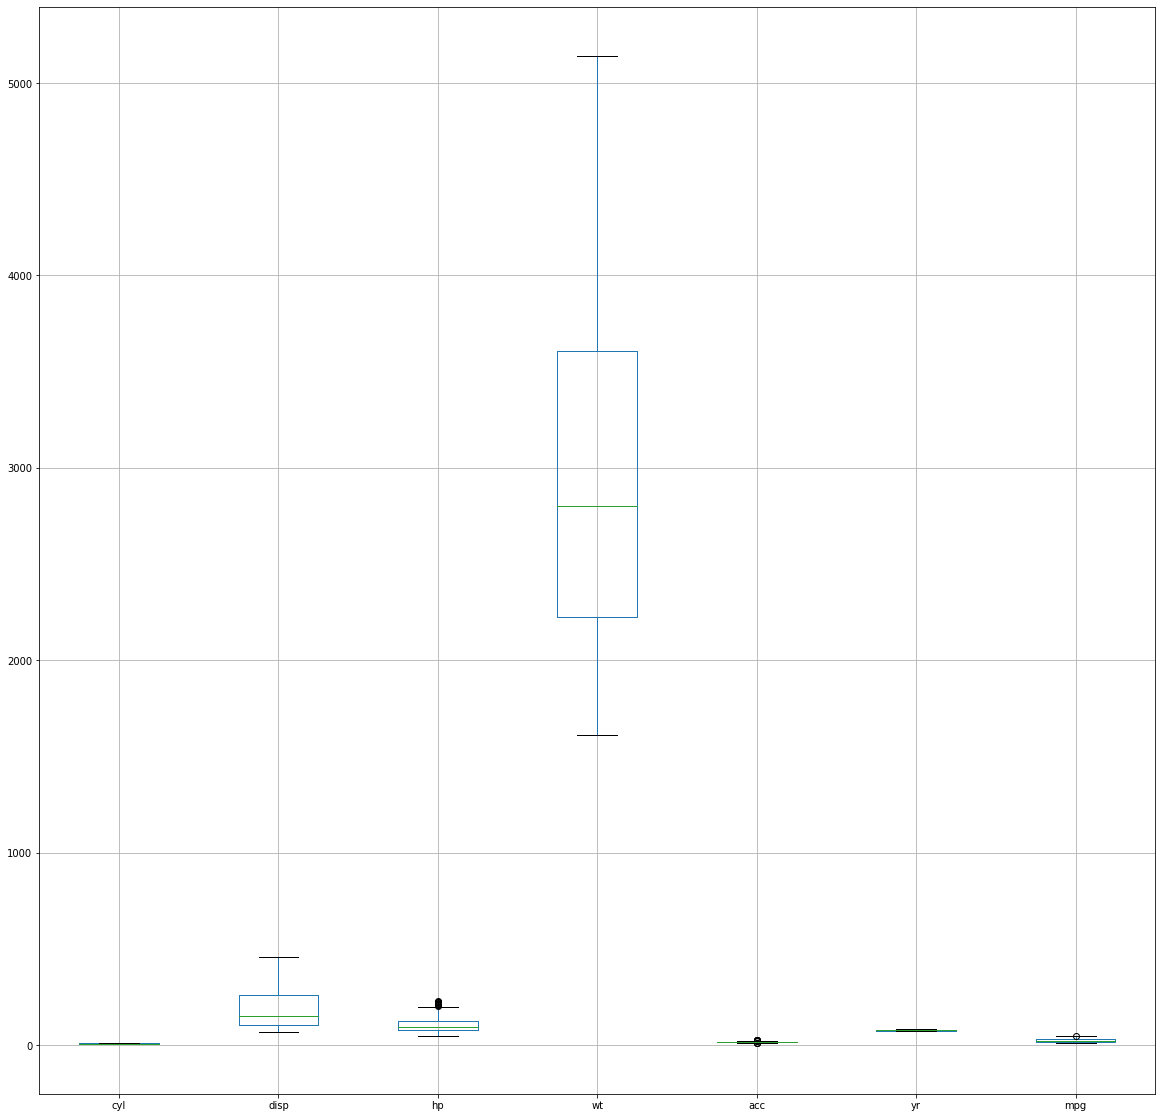

In [34]:
data_cars.boxplot(figsize=(20,20))

Since the number of outliers on the columns are managable, therefore, I would not go for removing outliers right now. I might be wrong here but looking at the number of outliers on each column, it tells me to leave as it

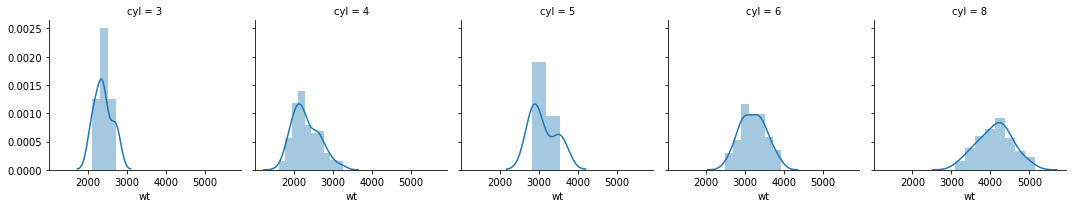

In [35]:
#checking relation between weight and cylinder
g = sns.FacetGrid(col='cyl',data=data_cars,legend_out=False)
g.map(sns.distplot,'wt')

From the above figure, if the weight of a car is 4 cylinder, then weight of the car is around 2k-3k. However if the car has 8 cyl then the weight is doubled up.

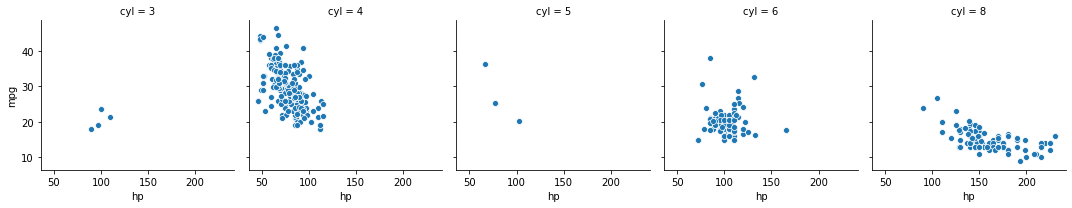

In [36]:
g = sns.FacetGrid(col='cyl',data=data_cars,legend_out=False)
g.map(sns.scatterplot,'hp','mpg')

As per the above figure, 4 cyclinder cars have 50-100 hp engine and 8 cylinders have 150-200. now more the HP it will have less mpg value because it will consume more fuel. where as lesser power more mpg value.

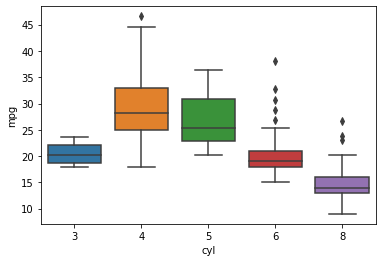

In [37]:
sns.boxplot('cyl','mpg',data=data_cars)

lesser the cylinder more the mpg because lesser power engine which consume less fuel.

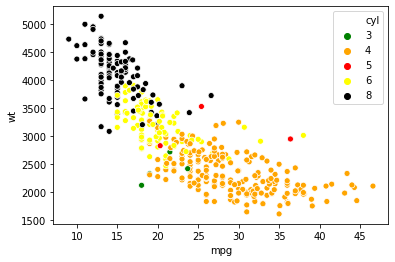

In [38]:
g =sns.scatterplot(x="mpg", y="wt", hue="cyl",
              data=data_cars, palette=['green','orange','red','yellow', 'black'])

As per the above figure, we see:
1. more the cylinder, more the weight and less miles per gallon.
2. Cars having high cylinder will have more weight and less mpg. 
3. Cars with less cylinder have less weight and more mpg
4. Cars with 4 cylinder weighs around between 2000-35000. and have average milage between 20-35

# K-MEANS and LINEAR REGRESSION

In [39]:
XData=data_cars
XData=XData.apply(zscore)

In [40]:
distortion=[]
sse_df = pd.DataFrame(columns=['K','SSE'])
K=range(1,11)
for i in K :
    
    #Initialize KMeans
    km = KMeans(n_clusters=i)
    
    #Fit on the data
    km.fit(XData)    
    cdistValue = (sum(np.min(cdist(XData, km.cluster_centers_, 'euclidean'), axis=1)))
    distortion.append(cdistValue/XData.shape[0])
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

In [41]:
cdistValue

382.1359968272533

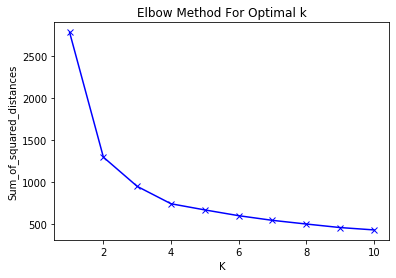

In [42]:
# sns.lineplot(x='K', y='SSE', data=sse_df)
plt.plot(K, sse_df.SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As per above diagram i.e. elbow curve, after k=4, SSE steeps down significantly. Thus optimal k = 4

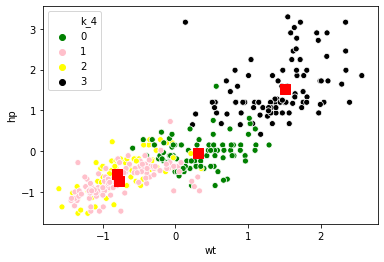

In [43]:
km=KMeans(n_clusters=4)
km.fit(XData)
XData['k_4'] = km.predict(XData)
sns.scatterplot(x='wt', y='hp', hue='k_4', data=XData, palette=['green','pink','yellow', 'black'])
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2], s=100, marker='s', c='red', label='Centroids')

There are four clusters in data represented in four different colors i.e. green, pink, yellow, black. 

centroids are represented with red squares

In [44]:
km.cluster_centers_

array([[ 0.42443037,  0.30530323, -0.03775766,  0.33776539,  0.29367006,
         0.03298635, -0.49682681],
       [-0.82534015, -0.78164519, -0.74051725, -0.76856959,  0.37498307,
         1.10179281,  1.18017325],
       [-0.86226631, -0.8085232 , -0.55740678, -0.75863563,  0.32955478,
        -0.64549188,  0.20271132],
       [ 1.49819126,  1.50392292,  1.52168282,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715]])

In [45]:
# since we have four cluster therefore, creating 4 dataframe based on clusters value on column k_4 in X dataframe

custer1_df = XData.loc[XData['k_4'] == 0]
custer2_df = XData.loc[XData['k_4'] == 1]
custer3_df = XData.loc[XData['k_4'] == 2]
custer4_df = XData.loc[XData['k_4'] == 3]

In [46]:
print('Shape of K1 Cluster is: ', custer1_df.shape)
print('Shape of K2 Cluster is: ', custer2_df.shape)
print('Shape of K3 Cluster is: ', custer3_df.shape)
print('Shape of K4 Cluster is: ', custer4_df.shape)

Shape of K1 Cluster is:  (91, 8)
Shape of K2 Cluster is:  (114, 8)
Shape of K3 Cluster is:  (99, 8)
Shape of K4 Cluster is:  (94, 8)


In [47]:
def LinearRegressionModel(dataset, name):
    X=dataset.drop(["mpg","k_4"], axis=1)
    y=dataset[['mpg']]
    test_size=0.30
    seed=7
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=test_size, random_state=seed)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    print("---------------------- {} --------------------".format(name))
    # Let us explore the coefficients for each of the independent attributes
    for idx, col_name in enumerate(X_train.columns):        
        print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
        predicted_labels = regression_model.predict(X_train)
    ## Train Accuracy
    print("Score for training data is =", regression_model.score(X_train, y_train))
    ## Test accuracy
    print("Score for test data is =", regression_model.score(X_test, y_test))
    print("---------------------- {} --------------------".format(name))

In [48]:
LinearRegressionModel(custer1_df, "cluster 1")

---------------------- cluster 1 --------------------
The coefficient for cyl is 0.10700085614052862
The coefficient for disp is 0.03434112328032862
The coefficient for hp is -0.3684381442805322
The coefficient for wt is -0.2924819629955561
The coefficient for acc is -0.16720867636812028
The coefficient for yr is 0.29255312735603406
Score for training data is = 0.5249468322917338
Score for test data is = 0.15136585459148544
---------------------- cluster 1 --------------------


In [49]:
LinearRegressionModel(custer2_df, "cluster 2")

---------------------- cluster 2 --------------------
The coefficient for cyl is 0.0
The coefficient for disp is -1.1632108912008694
The coefficient for hp is -0.21488832554869133
The coefficient for wt is -0.43283055451338504
The coefficient for acc is 0.07875532627288662
The coefficient for yr is 0.35620683310666595
Score for training data is = 0.5668332199353237
Score for test data is = -0.3281447060048064
---------------------- cluster 2 --------------------


In [50]:
LinearRegressionModel(custer3_df, "cluster 3")

---------------------- cluster 3 --------------------
The coefficient for cyl is 0.49486437923138904
The coefficient for disp is -0.8564993712533437
The coefficient for hp is -0.13966954452983343
The coefficient for wt is -0.5276211965373665
The coefficient for acc is -0.09816904790437658
The coefficient for yr is 0.08892166525301082
Score for training data is = 0.6538674581638328
Score for test data is = 0.36766630061186245
---------------------- cluster 3 --------------------


In [51]:
LinearRegressionModel(custer4_df, "cluster 4")

---------------------- cluster 4 --------------------
The coefficient for cyl is 0.0
The coefficient for disp is -0.15251515932995227
The coefficient for hp is -0.12255701622772164
The coefficient for wt is -0.020750658714135114
The coefficient for acc is -0.27708595258894686
The coefficient for yr is 0.19586398208199166
Score for training data is = 0.4875050904538402
Score for test data is = 0.6363079261603215
---------------------- cluster 4 --------------------
